<a href="https://colab.research.google.com/github/afeld/python-public-policy/blob/main/extras/pandas_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Analysis in Python

![pandas logo](img/pandas.png)

Aidan Feldman


Your network may block Google Colab 😕


## Stuff to know up front

- Pulled from [a Python for Public Policy class](https://python-public-policy.afeld.me/en/columbia/syllabus.html) I teach
- Going to go _very fast_. Stop me with any questions.
- Goal is not for you to totally get what's going on; goal is to whet your appetite 🐼 🐍


## Terminology

| Thing                                  | What is it?                                                                                                            |
| -------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| [Python][python]                       | programming language                                                                                                   |
| [package][package]                     | add-on/plugin for Python                                                                                               |
| [pandas][pandas]                       | package for data analysis                                                                                              |
| [Plotly][plotly]                       | package for data visualization                                                                                         |
| Jupyter                                | programming environment; supports Markdown + code + HTML output; can run Python and [tons of other languages][kernels] |
| [notebook][notebook]                   | individual Jupyter files; think Markdown file where you can execute the code snippets                                  |
| cell                                   | the code or text blocks within a notebook                                                                              |
| [Google Colaboratory ("Colab")][colab] | cloud-based Jupyter                                                                                                    |
| Markdown                               | markup language; think "simple HTML"                                                                                   |
| DataFrame                              | a table in pandas                                                                                                      |

[python]: https://www.python.org/about/
[package]: https://realpython.com/python-modules-packages/
[pandas]: https://pandas.pydata.org/
[plotly]: https://plotly.com/python/
[kernels]: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
[notebook]: https://docs.jupyter.org/en/latest/#what-is-a-notebook
[colab]: https://colab.research.google.com/


- Jupyter notebooks are magical. This presentation is a notebook.
- You can use pandas anywhere you can run Python, but Jupyter makes things easier.


### Command line vs. Jupyter

![Command line vs. Jupyter output](img/cli_vs_jupyter.png)


## Spreadsheets vs. pandas


### Why spreadsheets

- The easy stuff is easy
- Lots of people know how to use them
- Mostly just have to point, click, and scroll
- Data and logic live together as one


### Why pandas

- Data and logic _don't_ live together
- More powerful, flexible, and expressive than spreadsheet formulas

  - Don't have to cram into a single line

    ```
    =SUM(INDEX(C3:E9,MATCH(B13,C3:C9,0),MATCH(B14,C3:E3,0)))
    ```

  - Can have more descriptive data references than `Sheet1!A:A`


### Side-by-side<sup>1</sup>

|                       Task |      Spreadsheets      | pandas |
| -------------------------: | :--------------------: | :----: |
|           **Loading data** |          Easy          | Medium |
|           **Viewing data** |          Easy          | Medium |
|         **Filtering data** |          Easy          | Medium |
|      **Manipulating data** |         Medium         | Medium |
|           **Joining data** |          Hard          | Medium |
| **Complicated transforms** | Impossible<sup>2</sup> | Medium |
|             **Automation** | Impossible<sup>2</sup> | Medium |
|        **Making reusable** | Impossible<sup>2</sup> | Medium |
|         **Large datasets** | Impossible<sup>3</sup> |  Hard  |

<sup>1</sup> Ratings are obviously subjective.<br/>
<sup>2</sup> Not including scripting.<br/>
<sup>3</sup> Google Sheets and Excel have hard limits at 1-5 million rows, but get slow long before that.


## Try it!

1. [Open this notebook in Colab](https://colab.research.google.com/github/afeld/python-public-policy/blob/main/extras/pandas_crash_course.ipynb)
1. `File`->`Save a copy in Drive` (if you can)
1. Paste in [the following example](https://plotly.com/python/linear-fits/#linear-fit-trendlines-with-plotly-express)
1. Press the ▶️ button

```python
import plotly.express as px

tips = px.data.tips()
fig = px.scatter(tips, x="total_bill", y="tip", trendline="ols")
fig.show()
```


In [1]:
# your code here

pandas has some [built-in charting capabilities](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), but [Plotly Express](https://plotly.com/python/plotly-express/) is fancier (interactive).


### Jupyter basics

- You "run" a cell by either:
  - Pressing the ▶️ button
  - Pressing `⌘`+`Enter` (Mac) or `Control`+`Enter` (Windows) on your keyboard
- Cells don't run unless you tell them to, in the order you do so
  - Generally, you want to do so from the top every time you open a notebook


#### Output

- The last thing in a code cell is what gets displayed when it's run
- Just because there's existing output from a cell, doesn't mean that cell has been run during this session


### NOTEBOOKS HAVE STATE.

This trips people up frequently.


## Population counts in NYC Community Districts

- Lets do some data munging.
- Community Districts are basically neighborhoods.
- We'll use [this data for population by Community District](https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2/data).


Load pandas.


In [2]:
import pandas as pd

In [3]:
pd.options.display.max_rows = 20

Load data.


In [4]:
community_districts = pd.read_csv("https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv")
community_districts

Borough  CD Number                             CD Name  \
0           Bronx          1    Melrose, Mott Haven, Port Morris   
1           Bronx          2               Hunts Point, Longwood   
2           Bronx          3       Morrisania, Crotona Park East   
3           Bronx          4       Highbridge, Concourse Village   
4           Bronx          5  University Hts., Fordham, Mt. Hope   
..            ...        ...                                 ...   
54         Queens         13            Queens Village, Rosedale   
55         Queens         14        The Rockaways, Broad Channel   
56  Staten Island          1            Stapleton, Port Richmond   
57  Staten Island          2        New Springville, South Beach   
58  Staten Island          3   Tottenville, Woodrow, Great Kills   

    1970 Population  1980 Population  1990 Population  2000 Population  \
0            138557            78441            77214            82159   
1             99493            34399            39443            46824   
2            150636            53635            57162            68574   
3            144207           114312           119962           139563   
4            121807           107995           118435           128313   
..              ...              ...              ...              ...   
54           184647           173178           177535           196284   
55            98228           100592           100596           106686   
56           135875           138489           137806           162609   
57            85985           105128           113944           127071   
58            72815           108249           126956           152908   

    2010 Population  
0             91497  
1             52246  
2             79762  
3            146441  
4            128200  
..              ...  
54           188593  
55           114978  
56           175756  
57           132003  
58           160209  

[59 rows x 8 columns]

pandas can read/write directly to/from CSVs, SQL databases, Excel files, and [more](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).


What are the largest Community Districts?


In [5]:
community_districts.sort_values("2010 Population", ascending=False)

Borough  CD Number                        CD Name  1970 Population  \
48     Queens          7          Flushing, Bay Terrace           207589   
53     Queens         12    Jamaica, St. Albans, Hollis           206639   
37  Manhattan          8                Upper East Side           200851   
36  Manhattan          7     West Side, Upper West Side           212422   
29   Brooklyn         18            Canarsie, Flatlands           188643   
..        ...        ...                            ...              ...   
5       Bronx          6          East Tremont, Belmont           114137   
2       Bronx          3  Morrisania, Crotona Park East           150636   
30  Manhattan          1     Battery Park City, Tribeca             7706   
1       Bronx          2          Hunts Point, Longwood            99493   
34  Manhattan          5      Midtown Business District            31076   

    1980 Population  1990 Population  2000 Population  2010 Population  
48           204785           220508           242952           247354  
53           189383           201293           223602           225919  
37           204305           210880           217063           219920  
36           206669           210993           207699           209084  
29           169092           162428           194653           193543  
..              ...              ...              ...              ...  
5             65016            68061            75688            83268  
2             53635            57162            68574            79762  
30            15918            25366            34420            60978  
1             34399            39443            46824            52246  
34            39544            43507            44028            51673  

[59 rows x 8 columns]

### Hands-on

What Community District has the smallest population in 1980?


In [6]:
# your code here

What are the populations per borough?


In [7]:
pop_by_borough = community_districts.groupby("Borough").sum()
pop_by_borough

/var/folders/kr/nx0m1j811kz5vy8c87ffchzr0000gn/T/ipykernel_96886/2552231591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_by_borough = community_districts.groupby("Borough").sum()


CD Number  1970 Population  1980 Population  1990 Population  \
Borough                                                                       
Bronx                 78          1478524          1170349          1197420   
Brooklyn             171          2601668          2230849          2300650   
Manhattan             78          1532399          1421260          1479844   
Queens               105          1985995          1896401          1965471   
Staten Island          6           294675           351866           378706   

               2000 Population  2010 Population  
Borough                                          
Bronx                  1327454          1380697  
Brooklyn               2465299          2504609  
Manhattan              1529357          1577385  
Queens                 2240510          2241021  
Staten Island           442588           467968

You'll often see DataFrames called `df`, but I'd argue this is bad practice.


It summed all numeric columns, but the `CD Number` doesn't make sense in there. Let's remove.


In [8]:
pop_by_borough.drop(["CD Number"], axis=1)

1970 Population  1980 Population  1990 Population  \
Borough                                                            
Bronx                  1478524          1170349          1197420   
Brooklyn               2601668          2230849          2300650   
Manhattan              1532399          1421260          1479844   
Queens                 1985995          1896401          1965471   
Staten Island           294675           351866           378706   

               2000 Population  2010 Population  
Borough                                          
Bronx                  1327454          1380697  
Brooklyn               2465299          2504609  
Manhattan              1529357          1577385  
Queens                 2240510          2241021  
Staten Island           442588           467968

Most operations in pandas return copies — `drop()` didn't modify original DataFrame.


How have the populations changed?


In [9]:
pop_by_borough.pct_change(axis="columns")

CD Number  1970 Population  1980 Population  1990 Population  \
Borough                                                                       
Bronx                NaN     18954.435897        -0.208434         0.023131   
Brooklyn             NaN     15213.432749        -0.142531         0.031289   
Manhattan            NaN     19645.141026        -0.072526         0.041220   
Queens               NaN     18913.238095        -0.045113         0.036422   
Staten Island        NaN     49111.500000         0.194082         0.076279   

               2000 Population  2010 Population  
Borough                                          
Bronx                 0.108595         0.040109  
Brooklyn              0.071566         0.015945  
Manhattan             0.033458         0.031404  
Queens                0.139935         0.000228  
Staten Island         0.168685         0.057345

## Mapping

We'll use [this GIS data of the Community District boundaries](https://data.cityofnewyork.us/City-Government/Community-Districts/yfnk-k7r4).


It identifies the Community Districts by a `boro_cd`, which is the borough (as a number) + the (padded) Community District number. Let's derive that.


In [10]:
def code_borocd(row):
    if row["Borough"] == "Manhattan":
        borough_num = 100
    elif row["Borough"] == "Bronx":
        borough_num = 200
    elif row["Borough"] == "Brooklyn":
        borough_num = 300
    elif row["Borough"] == "Queens":
        borough_num = 400
    elif row["Borough"] == "Staten Island":
        borough_num = 500
    else:
        return "Invalid BoroCD"

    return str(borough_num + row["CD Number"])


community_districts["Borough CD"] = community_districts.apply(code_borocd, axis=1)
community_districts[["Borough", "CD Number", "Borough CD"]]

Borough  CD Number Borough CD
0           Bronx          1        201
1           Bronx          2        202
2           Bronx          3        203
3           Bronx          4        204
4           Bronx          5        205
..            ...        ...        ...
54         Queens         13        413
55         Queens         14        414
56  Staten Island          1        501
57  Staten Island          2        502
58  Staten Island          3        503

[59 rows x 3 columns]

In [11]:
import plotly.express as px

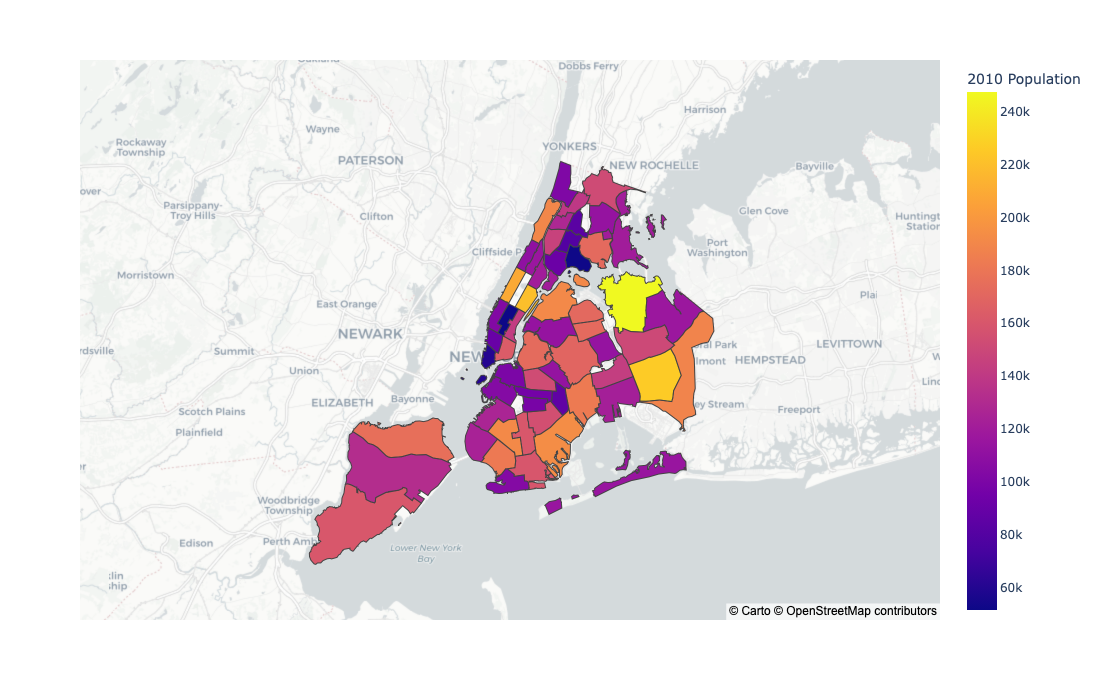

In [12]:
geojson = "https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=GeoJSON"

fig = px.choropleth_mapbox(
    community_districts,  # source data
    geojson=geojson,  # the boundary data
    locations="Borough CD",  # the column name to match on
    featureidkey="properties.boro_cd",  # the GeoJSON property to match on
    color="2010 Population",  # what to use as the color scale value
    hover_data=["CD Name"],  # what to show in tooltips
    center={"lat": 40.73, "lon": -73.98},
    zoom=9,
    mapbox_style="carto-positron",
    height=700,
)

fig.show()

[A more advanced example](https://colab.research.google.com/drive/1LWevMJZ8mOFjNY_NLK_rFNQbg0pQNZpD)


[pandas resources](https://python-public-policy.afeld.me/en/latest/#resources)


![pandas logo](img/pandas.png)

Questions?

[@aidanfeldman](https://twitter.com/aidanfeldman)<br/>
[aidan.feldman@gmail.com](mailto:aidan.feldman@gmail.com)
